In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error

In [165]:
df=pd.read_csv("home_data.csv")

In [166]:
df.index

RangeIndex(start=0, stop=21613, step=1)

In [167]:
print(len(df.index)) 

21613


In [168]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [169]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [170]:
train, test=train_test_split(df, test_size=0.2)

In [171]:
#Predictors=(train.iloc[:,1:])  (github)

In [172]:
#Test_Predictors = test.iloc[:,1:]  (github)

In [173]:
reg=linear_model.LinearRegression()

In [174]:
reg_f=linear_model.LinearRegression()

In [175]:
features=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [176]:
reg.fit(train[['sqft_living']],train.price)

LinearRegression()

In [177]:
reg_f.fit(train[features],train.price)

LinearRegression()

In [178]:
y_pred=reg.predict(test[['sqft_living']])

In [179]:
yf_pred=reg_f.predict(test[features])

In [180]:
np.sqrt(mean_squared_error(test[['price']],y_pred))

260269.88218638234

In [181]:
max_error(test[['price']],y_pred)

4280515.962883524

In [182]:
max_error(test[['price']],yf_pred)

4108374.1615261137

In [183]:
np.sqrt(mean_squared_error(test[['price']],yf_pred))

255360.28017275868

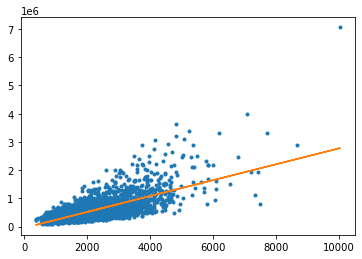

In [184]:
plt.plot(test[['sqft_living']],test[['price']],".",test[['sqft_living']],y_pred,"-")

In [185]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [186]:
#df['bedrooms'].value_counts().index.tolist()# return in form of list

In [187]:
h1=df[df['zipcode']==98039]

In [188]:
print(h1)


               id             date    price  bedrooms  bathrooms  sqft_living  \
2974   3625049014  20140829T000000  2950000         4       3.50         4860   
3761   2540700110  20150212T000000  1905000         4       3.50         4210   
4077   3262300940  20141107T000000   875000         3       1.00         1220   
4078   3262300940  20150210T000000   940000         3       1.00         1220   
4149   6447300265  20141014T000000  4000000         4       5.50         7080   
4411   2470100110  20140804T000000  5570000         5       5.75         9200   
4791   2210500019  20150324T000000   937500         3       1.00         1320   
5178   6447300345  20150406T000000  1160000         4       3.00         2680   
5589   6447300225  20141106T000000  1880000         3       2.75         2620   
5880   2525049148  20141007T000000  3418800         5       5.00         5450   
6868   3262300235  20141126T000000  1555000         5       2.50         2870   
7501   2525049133  20150402T

In [189]:
h1.price.mean()

2160606.6

In [190]:
newdf=df[(df.sqft_living > 2000) & (df.sqft_living < 4000)]

In [191]:
print (len(newdf.index))

9111


In [192]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [193]:
#del train['id'] github
#del train['date']
#del test['id']
#del test['date']

In [194]:
#Test_Predictors = test.loc[:,1:] github #Predictors = train.iloc[:,1:]

In [200]:
train, test=train_test_split(df, test_size=0.2)

In [201]:
reg_af=linear_model.LinearRegression()

In [211]:
reg_af.fit(train[advanced_features],train.price)

LinearRegression()

In [212]:
#y2=reg_af.predict(Test_Predictors) github

In [215]:
y_af=reg_af.predict(test[advanced_features])

In [216]:
np.sqrt(mean_squared_error(test['price'],y_af))

198205.52412148943